### A starting notebook for homework 3

The next line activates the environment in which we are working on HW3. It is assumed that you already generated this environment, per the instructions in the document *UsingJulia.pdf*

In [1]:
using Pkg
Pkg.activate("/Users/jeff/Dropbox/MAE250H/julia/HW3")

"/Users/jeff/Dropbox/MAE250H/julia/HW3/Project.toml"

These load in some packages useful for this notebook

In [2]:
using Revise
using Plots
using LinearAlgebra
using HW3

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.1/Revise/M1Qoh.ji for Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1184
[ Info: Generating builtins for this julia version...


### Using 1-D data types

In [3]:
w = ones(5)
p = HW3.CellData1D(w)

5-element HW3.CellData1D{3}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [4]:
size(p)

(5,)

In [5]:
p = HW3.CellData1D(5)

7-element HW3.CellData1D{5}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

We can index `p` as though it were an array itself:

In [6]:
p[5] = 1
p

7-element HW3.CellData1D{5}:
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0

In [7]:
p[2:5]

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 1.0

For example, if we want to make a copy of `p`, we might do this:

In [8]:
p2 = HW3.CellData1D(p)
p2 .= p

7-element HW3.CellData1D{5}:
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0

Now set up some edge data on the same grid

In [9]:
q = HW3.EdgeData1D(p)

6-element HW3.EdgeData1D{5}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [10]:
p2 = HW3.CellData1D(p)
p2 .= p

7-element HW3.CellData1D{5}:
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0

In [11]:
q = HW3.EdgeData1D(p)

6-element HW3.EdgeData1D{5}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [12]:
p = HW3.CellData1D(ones(5))
p2 = -p

5-element HW3.CellData1D{3}:
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0

In [13]:
p = HW3.CellData1D(ones(5))

5-element HW3.CellData1D{3}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [14]:
using LinearAlgebra

In [15]:
p = HW3.CellData1D(ones(7))
q = HW3.EdgeData1D(p)
q.data[4] = 1
q2 = 2*q
dot(q,q2)

0.4

In [16]:
p = HW3.CellData1D(5)
p.data .= 1:7
q = HW3.EdgeData1D(p)
HW3.translate!(q,p)

6-element HW3.EdgeData1D{5}:
 1.5
 2.5
 3.5
 4.5
 5.5
 6.5

In [17]:
HW3.gradient(p)

6-element HW3.EdgeData1D{5}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

### Time marching

Here we will demonstrate how to use the RK time marching in HW3. We will integrate the very simple scalar-valued equation

$$ \frac{\mathrm{d} u}{\mathrm{d} t} = -t^2 $$

subject to initial condition $u(0) = 1$. Obviously the exact solution is $u(t) = 1-t^3/3$.

In [18]:
uex(t) = 1 - t^3/3

uex (generic function with 1 method)

#### Set the right-hand side function. This should take arguments `u` (the current state vector) and `t` (current time) and return du/dt.

In [19]:
function f1(u,t)
    du = deepcopy(u)
    du[1] = -t^2
    return du
end

f1 (generic function with 1 method)

Because the RK function only works on vectors of data, we need to set the scalar data as a 1-element vector:

In [20]:
u0 = [1.0]

1-element Array{Float64,1}:
 1.0

Now set up the integrator and time-step size. Note that we supply an example of the state vector, the time step size, and the right-hand side function. We also specify the type of RK method; here, 4th-order Runge-Kutta.

In [21]:
Δt = 0.01
rk = HW3.RK(u0,Δt,f1;rk=HW3.RK4)

Order-4 RK integator with
   State of type Array{Float64,1}
   Time step size 0.01


Advance the solution to tf = 1. Copy the solution into arrays for later use.

In [22]:
tf = 1.0
nsteps = ceil(Int,tf/Δt)

t = 0.0
u = copy(u0)
uarray = []
tarray = []
push!(uarray,u[1])
push!(tarray,t)
for j = 1:nsteps
    t, u = rk(t,u)
    push!(uarray,u[1])
    push!(tarray,t)
end

Compare solution with exact solution. We get machine precision on this one because it is a low-order polynomial.

In [23]:
norm(uarray-uex.(tarray))

5.700106010750188e-15

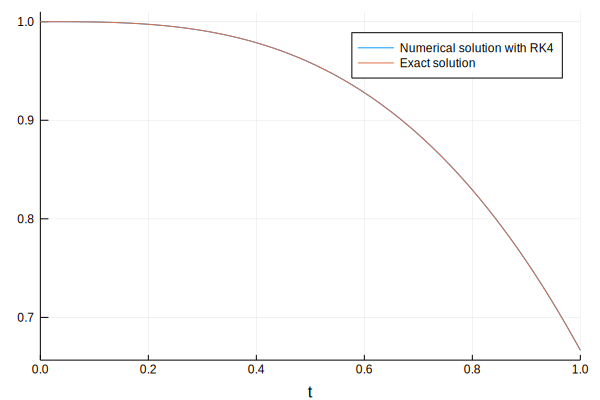

In [24]:
plot(tarray,uarray,xlim=(0,tf),label="Numerical solution with RK4")
plot!(tarray,uex.(tarray),label="Exact solution",xlabel="t")